## Визуализация Embeddings с использованием TSNE

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================
!pip uninstall tensorflow
!pip uninstall xarray-einstats
!pip uninstall jax

!pip install gensim==3.6.0
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install scikit-learn==0.21.3
!pip install nltk==3.2.5

# ===========================

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Found existing installation: xarray-einstats 0.2.2
Uninstalling xarray-einstats-0.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xarray_einstats-0.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xarray_einstats/*
Proceed (y/n)? y
  Successfully uninstalled xarray-einstats-0.2.2
Found existing installation: jax 0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 6.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████

In [ ]:

!pip uninstall cmdstanpy
!pip install -U numpy==1.19.5

Found existing installation: cmdstanpy 1.0.7
Uninstalling cmdstanpy-1.0.7:
  Would remove:
    /usr/local/bin/install_cmdstan
    /usr/local/bin/install_cxx_toolchain
    /usr/local/lib/python3.7/dist-packages/cmdstanpy-1.0.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/cmdstanpy/*
Proceed (y/n)? y
  Successfully uninstalled cmdstanpy-1.0.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Загрузка файлов

try:
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    print("Not using colab")

Saving word2vec_cbow.bin to word2vec_cbow.bin


In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:06<00:00, 257MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
import os
import wget
import gzip
import shutil


gn_vec_zip_path = "/content/GoogleNews-vectors-negative300 (1).bin.gz"
gn_vec_path = "word2vec_cbow.bin"

#Extracting the required model
with gzip.open(gn_vec_zip_path, 'rb') as f_in:
    with open(gn_vec_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


print(f"Model at {gn_vec_path}")

In [ ]:
from gensim.models import Word2Vec, KeyedVectors #Чтобы загрузить модель
import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# загрузка модели
try:
    import google.colab
    model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin',binary=True)
except ModuleNotFoundError:
    cwd=os.getcwd() 
    model = KeyedVectors.load_word2vec_format(cwd+'\Models\word2vec_cbow.bin', binary=True)

In [ ]:
model

## TSNE
t-SNE обозначает t-распределенные стохастические соседние объекты. Это метод, используемый для визуализации многомерных данных путем уменьшения их до 2 или 3 измерений.
 

In [ ]:
#Предварительная обработка словаря наших моделей для улучшения визуализации

words_vocab= list(model.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Давайте удалим из этого стоп-слова, это поможет сделать визуализацию чище.
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#Размер не сильно уменьшился после удаления стоп-слов, поэтому давайте попробуем визуализировать только выбранное подмножество слов.

Size of Vocabulary: 161018
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'are', 'also', 'which', 'or', 'this', 'first', 'new', 'be', 'has', 'one', 'had', 'after', 'who', 'their', 'not', 'its', 'but', 'two', 'her', 'they', 'th', 'she', 'school', 'references', 'time', 'have', 'all', 'other', 'when', 'been']
Size of Vocabulary without stopwords: 159128
Few words in Vocabulary without stopwords ['school', 'references', 'time', 'year', 'bar', 'links', 'external', 'world', 'city', 'state', 'years', 'national', 'university', 'united', 'team', 'american', 'text', 'st', 'born', 'season', 'film', 'part', 'made', 'south', 'high', 'league', 'history', 'series', 'john', 'north']


In [ ]:
#С увеличением объема данных становится все труднее визуализировать и интерпретировать
#На практике похожие слова объединяются в группы для дальнейшей визуализации.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-2.0008528  -1.3943557   1.4382704   0.8446866  -2.6626322   4.434941
 -2.874781    0.07160501  2.7645476   1.3397316  -1.5362843   1.9484733
 -1.538581    2.8054123  -0.1651442  -2.2072346  -1.2407984  -0.37212235
  1.7854097   1.51354     0.4680834  -6.1942625   2.0242858  -3.7782066
  0.57537895 -3.029885   -2.5517325  -2.4161081  -0.49409848  3.473683
  0.17055503 -3.9063861   3.884543    1.5628031  -2.2993872   2.1060982
 -3.3538942  -2.4706185   1.1629843  -0.9444056   1.4299889   0.32925856
  3.2923906  -0.6086113  -0.42672086  1.1591744  -3.224612    0.6084651
  2.366192    2.6875043   1.3349053  -3.0747583  -2.503866    1.5077431
 -1.024039    1.5941241   0.7730264  -0.42380166 -0.56361014  1.6036558
  1.9689867  -2.8361151   0.25759864 -5.638323    1.436891   -0.14189413
 -4.712218   -2.0199313  -0.9636327   3.3833733  -1.5988349   0.37275377
 -2.4628592  -1.6039482   0.21491958 -1.4248031  -1.4473001  -3.5625575
 -0.19743128  1.3642663   1.2659378  -2.61

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sk

### Hyperparameters of TSNE

1. n_components: количество компонентов, т. е. размерность пространства значений.
2. perplexity: количество эффективных соседей
3. n_iter: Максимальное количество итераций для оптимизации.
4. init: Инициализация встраивания.

t-SNE требует хорошей настройки гиперпараметров для получения эффективных результатов. Более подробную информацию о гиперпараметрах можно найти в официальной [документации] (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Также очень легко неправильно истолковать tsne. Эта [статья] (https://distill.pub/2016/misread-tsne/) содержит больше подробностей об этом.

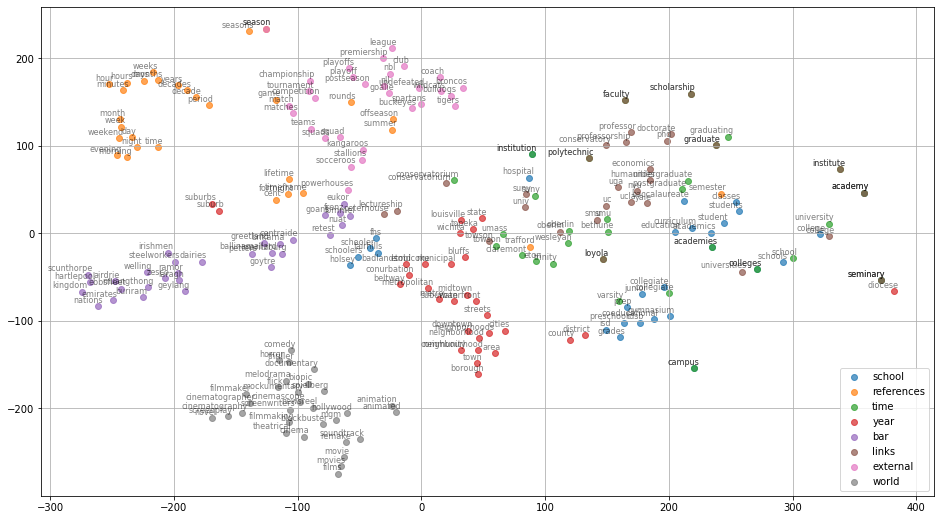

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sk

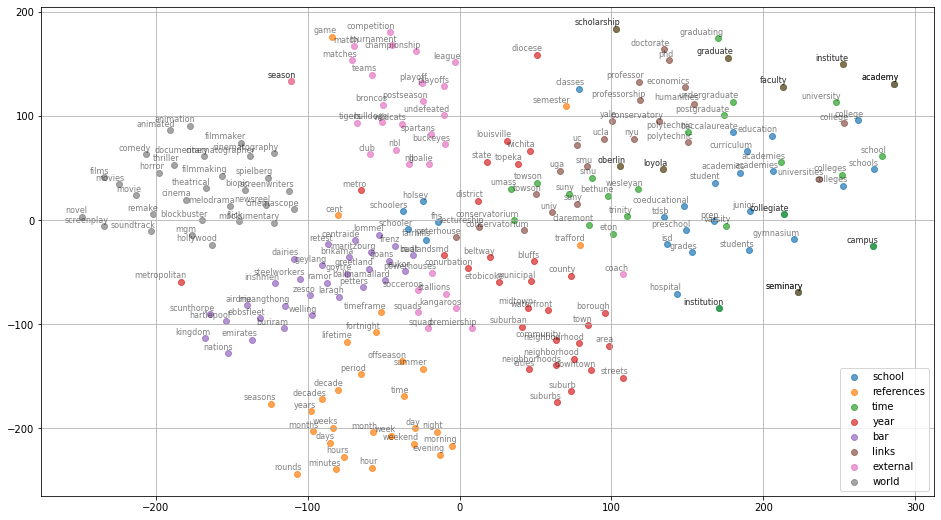

In [ ]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sk

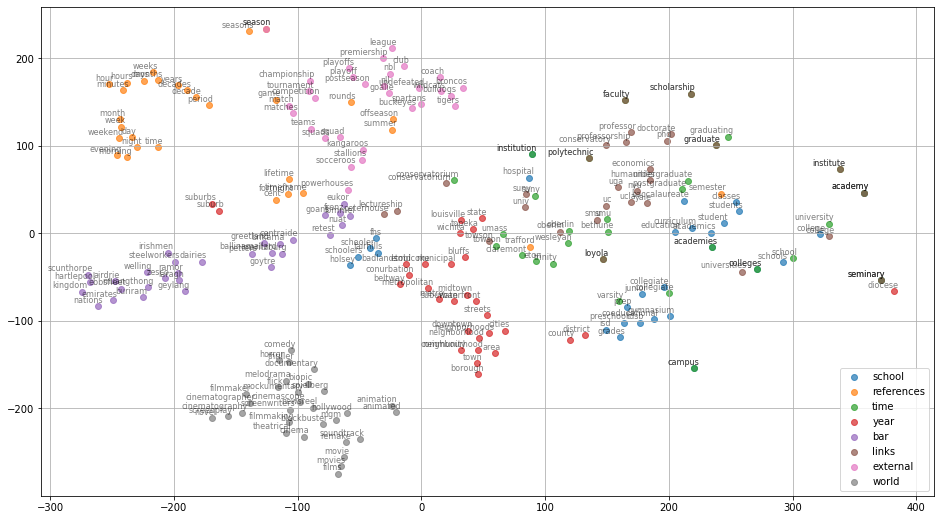

In [ ]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

Взгляните на 3 графика выше. Мы не можем сказать, что большее или меньшее perplexity — это хорошо. Это зависит от решаемой проблемы. Здесь графики perplexity 5,10 выражены гораздо лучше, чем с 25.

# FastText

мы продемонстрируем использование библиотеки fastText для выполнения классификации текста по данным dbpedie, которые можно загрузить отсюда (https://github.com/le-scientifique/torchDatasets/raw/master/dbpedia_csv.tar.gz). ). <br>fastText — это библиотека для изучения word embedding и классификации текста, созданная лабораторией Facebook AI Research (FAIR). Модель позволяет создать алгоритм обучения без учителя или обучения с учителем для получения векторных представлений слов. Facebook предоставляет предварительно обученные модели для 294 языков (источник: [вики] (https://en.wikipedia.org/wiki/FastText)).<br>


In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install pandas==1.1.5
!pip install wget==3.2
!pip install fasttext==0.9.2

# ===========================

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 24.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5ddd042f8d307b62e7290dbf9c6f58bc8db87dd1186bd1432bec2d130d042229
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 7.2 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3163350 sha256=1b5c

In [ ]:

import os
import pandas as pd
import wget
import tarfile

In [ ]:
try :
    
    from google.colab import files
    
    # Загружаем данные
    !wget -P DATAPATH https://github.com/le-scientifique/torchDatasets/raw/master/dbpedia_csv.tar.gz

    # распаковываем файлы
    !tar -xvf DATAPATH/dbpedia_csv.tar.gz -C DATAPATH

    # быстрый просмотр структуры папок
    !ls -lah DATAPATH
    
    # указываем путь к данным
    data_path = 'DATAPATH'
    
except ModuleNotFoundError:
    
    if not os.path.exists(os.getcwd()+'\\Data\\dbpedia_csv') :
        # Загружаем данные
        url="https://github.com/le-scientifique/torchDatasets/raw/master/dbpedia_csv.tar.gz"
        path=os.getcwd()+'\Data'
        wget.download(url,path)

        # распаковываем файлы
        temp=path+'\dbpedia_csv.tar.gz'
        tar = tarfile.open(temp, "r:gz")
        tar.extractall(path)     
        tar.close()
    
    # указываем data_path
    data_path='Data'

--2022-09-07 17:59:51--  https://github.com/le-scientifique/torchDatasets/raw/master/dbpedia_csv.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/srhrshr/torchDatasets/raw/master/dbpedia_csv.tar.gz [following]
--2022-09-07 17:59:51--  https://github.com/srhrshr/torchDatasets/raw/master/dbpedia_csv.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/srhrshr/torchDatasets/master/dbpedia_csv.tar.gz [following]
--2022-09-07 17:59:51--  https://raw.githubusercontent.com/srhrshr/torchDatasets/master/dbpedia_csv.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443...

In [ ]:
# Загружаем train data
train_file = data_path + '/dbpedia_csv/train.csv'
df = pd.read_csv(train_file, header=None, names=['class','name','description'])
# Загружаем test data
test_file = data_path + '/dbpedia_csv/test.csv'
df_test = pd.read_csv(test_file, header=None, names=['class','name','description'])
# Data 
print("Train:{} Test:{}".format(df.shape,df_test.shape))


Train:(560000, 3) Test:(70000, 3)


In [ ]:
# Сопоставление номера класса с именем класса
class_dict={
            1:'Company',
            2:'EducationalInstitution',
            3:'Artist',
            4:'Athlete',
            5:'OfficeHolder',
            6:'MeanOfTransportation',
            7:'Building',
            8:'NaturalPlace',
            9:'Village',
            10:'Animal',
            11:'Plant',
            12:'Album',
            13:'Film',
            14:'WrittenWork'
        }

# Применяем к DataFrame
df['class_name'] = df['class'].map(class_dict)
df.head()

,class,name,description,class_name
0,1,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...,Company
1,1,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...,Company
2,1,Q-workshop,Q-workshop is a Polish company located in Poz...,Company
3,1,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...,Company
4,1,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...,Company


In [ ]:
df["class_name"].value_counts()

Athlete                   40000
Building                  40000
Album                     40000
Artist                    40000
MeanOfTransportation      40000
Company                   40000
Village                   40000
Animal                    40000
Film                      40000
WrittenWork               40000
Plant                     40000
EducationalInstitution    40000
OfficeHolder              40000
NaturalPlace              40000
Name: class_name, dtype: int64

In [ ]:

def clean_it(text,normalize=True):
    # Замена возможных проблем с данными. Мы можем добавить или уменьшить замену в этой цепочке
    s = str(text).replace(',',' ').replace('"','').replace('\'',' \' ').replace('.',' . ').replace('(',' ( ').\
            replace(')',' ) ').replace('!',' ! ').replace('?',' ? ').replace(':',' ').replace(';',' ').lower()
    
    # нормализация/кодирование текста
    if normalize:
        s = s.normalize('NFKD').str.encode('ascii','ignore').str.decode('utf-8')
    
    return s

# Теперь давайте определим небольшую функцию, в которой мы можем использовать описанную выше очистку наборов данных.
def clean_df(data, cleanit= False, shuffleit=False, encodeit=False, label_prefix='__class__'):
    # Задание новых данных
    df = data[['name','description']].copy(deep=True)
    df['class'] = label_prefix + data['class'].astype(str) + ' '
    
    # очистка
    if cleanit:
        df['name'] = df['name'].apply(lambda x: clean_it(x,encodeit))
        df['description'] = df['description'].apply(lambda x: clean_it(x,encodeit))
    
    # перемешивание
    if shuffleit:
        df.sample(frac=1).reset_index(drop=True)
            
    return df

In [ ]:
%%time
# Преобразуем наборы данных, используя приведенные выше чистые функции
df_train_cleaned = clean_df(df, True, True)
df_test_cleaned = clean_df(df_test, True, True)

CPU times: user 3.79 s, sys: 171 ms, total: 3.96 s
Wall time: 3.95 s


In [ ]:
# Записываем файлы на диск, так как API классификатора fastText читает файлы с диска.
train_file = data_path + '/dbpedia_train.csv'
df_train_cleaned.to_csv(train_file, header=None, index=False, columns=['class','name','description'] )

test_file = data_path + '/dbpedia_test.csv'
df_test_cleaned.to_csv(test_file, header=None, index=False, columns=['class','name','description'] )


Теперь, когда у нас есть обучающие и тестовые файлы, записанные на диск в формате, который нужен fastText, мы готовы использовать его для классификации текста!

In [ ]:
%%time
## Использование fastText для извлечения признаков и обучения
from fasttext import train_supervised 
"""fastText ожидает и обучающий файл (csv), имя модели в качестве входных аргументов.
label_prefix относится к префиксу перед строкой метки в наборе данных.
по умолчанию __метка__. В нашем наборе данных это __class__.
Есть несколько других параметров, которые можно увидеть в:
https://pypi.org/project/fasttext/
"""
model = train_supervised(input=train_file, label="__class__", lr=1.0, epoch=75, loss='ova', wordNgrams=2, dim=200, thread=2, verbose=100)

CPU times: user 45min 14s, sys: 12.3 s, total: 45min 26s
Wall time: 22min 42s


In [ ]:
for k in range(1,6):
    results = model.test(test_file,k=k)
    print(f"Test Samples: {results[0]} Precision@{k} : {results[1]*100:2.4f} Recall@{k} : {results[2]*100:2.4f}")

Test Samples: 70000 Precision@1 : 89.0814 Recall@1 : 89.0814
Test Samples: 70000 Precision@2 : 47.0171 Recall@2 : 94.0343
Test Samples: 70000 Precision@3 : 31.7114 Recall@3 : 95.1343
Test Samples: 70000 Precision@4 : 23.8296 Recall@4 : 95.3186
Test Samples: 70000 Precision@5 : 19.0977 Recall@5 : 95.4886


## Deep Learning Embeddings

мы продемонстрируем различные модели классификации текста, обученные с использованием набора данных обзоров IMDB.

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy==1.19.5
!pip install wget==3.2
!pip install tensorflow==1.14.0

# ===========================

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 29.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.17 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 40 kB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 488 kB 85.1 MB/s 
     |████████████████████████████████| 3.1 MB 61.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninsta

In [ ]:
#Make the necessary imports
import os
import sys
import numpy as np
import tarfile
import wget
import warnings
warnings.filterwarnings("ignore") 
from zipfile import ZipFile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

Здесь мы устанавливаем все пути ко всем внешним наборам данных и моделям, таким как [glove](https://nlp.stanford.edu/projects/glove/) и [набор данных обзоров IMDB](http://ai.stanford.edu /~amaas/данные/настроение/).

In [ ]:
%%capture
try:
    
    from google.colab import files
    
    !wget -P DATAPATH http://nlp.stanford.edu/data/glove.6B.zip
    !unzip DATAPATH/glove.6B.zip -d DATAPATH/glove.6B
    
    !wget -P DATAPATH http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xvf DATAPATH/aclImdb_v1.tar.gz -C DATAPATH
    
    BASE_DIR = 'DATAPATH'
    
except ModuleNotFoundError:
    
    if not os.path.exists('Data/glove.6B'):
        os.mkdir('Data/glove.6B')
        
        url='http://nlp.stanford.edu/data/glove.6B.zip'  
        wget.download(url,'Data')  
  
        temp='Data/glove.6B.zip' 
        file = ZipFile(temp)  
        file.extractall('Data/glove.6B') 
        file.close()
        
        
        
    if not os.path.exists('Data/aclImdb'):
        
        url='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz' 
        wget.download(url,'Data')
        
        temp='Data/aclImdb_v1.tar.gz' 
        tar = tarfile.open(temp, "r:gz")
        tar.extractall('Data')      
        tar.close()
    
    BASE_DIR = 'Data'

In [ ]:
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TRAIN_DATA_DIR = os.path.join(BASE_DIR, 'aclImdb/train')
TEST_DATA_DIR = os.path.join(BASE_DIR, 'aclImdb/test')

In [ ]:
# Внутри них у меня есть только папки pos/ и neg/, содержащие текстовые файлы
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000 
EMBEDDING_DIM = 100 
VALIDATION_SPLIT = 0.2



### Loading and Preprocessing
 

In [ ]:
#Функция для загрузки данных из набора данных в блокнот. Будет вызываться дважды - для обучения и тестирования.
def get_data(data_dir):
    texts = []  # список образцов текста
    labels_index = {'pos':1, 'neg':0}  # словарь сопоставления имени метки с числовым идентификатором
    labels = []  # список label ids
    for name in sorted(os.listdir(data_dir)):
        path = os.path.join(data_dir, name)
        if os.path.isdir(path):
            if name=='pos' or name=='neg':
                label_id = labels_index[name]
                for fname in sorted(os.listdir(path)):
                        fpath = os.path.join(path, fname)
                        text = open(fpath,encoding='utf8').read()
                        texts.append(text)
                        labels.append(label_id)
    return texts, labels

train_texts, train_labels = get_data(TRAIN_DATA_DIR)
test_texts, test_labels = get_data(TEST_DATA_DIR)
labels_index = {'pos':1, 'neg':0} 

# Просто чтобы посмотреть, как выглядят данные
#print(train_texts[0])
#print(train_labels[0])
#print(test_texts[24999])
#print(test_labels[24999])

In [ ]:
#Векторизация этих образцов текста в двумерный целочисленный тензор с помощью Keras Tokenizer
#Tokenizer тренируется только для обучающих данных и используется для токенизации как обучающих, так и тестовых данных.
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS) 
tokenizer.fit_on_texts(train_texts) 
train_sequences = tokenizer.texts_to_sequences(train_texts) #Converting text to a vector of word indexes 
test_sequences = tokenizer.texts_to_sequences(test_texts) 
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [ ]:
#Преобразование в последовательности для загрузки в нейронную сеть. Макс. посл. len равно 1000, как установлено ранее
# начальное заполнение 0, пока вектор не станет размером MAX_SEQUENCE_LENGTH
trainvalid_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
trainvalid_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.asarray(test_labels))

# разделить обучающие данные на обучающий набор и проверочный набор
indices = np.arange(trainvalid_data.shape[0])
np.random.shuffle(indices)
trainvalid_data = trainvalid_data[indices]
trainvalid_labels = trainvalid_labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * trainvalid_data.shape[0])
x_train = trainvalid_data[:-num_validation_samples]
y_train = trainvalid_labels[:-num_validation_samples]
x_val = trainvalid_data[-num_validation_samples:]
y_val = trainvalid_labels[-num_validation_samples:]
#Это данные, которые мы будем использовать для обучения CNN и RNN
print('Splitting the train data into train and valid is done')

Splitting the train data into train and valid is done


In [ ]:
print('Preparing embedding matrix.')

# во-первых, построим маппинг embeddings_index 
# к их вектору embedding
embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors in Glove embeddings.' % len(embeddings_index))
#print(embeddings_index["google"])

# подготовить матрицу встраивания - строки - это слова из word_index, столбцы - это вложения этого слова из GLOVE.
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # слова, не найденные в embeddings_index, будут состоять из нулей.
        embedding_matrix[i] = embedding_vector

# загрузить эти предварительно обученные embedding в слой Embedding
# обратите внимание, что мы устанавливаем trainable = False, чтобы embedding оставались фиксированными
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
print("Preparing of embedding matrix is done")

Preparing embedding matrix.
Found 400000 word vectors in Glove embeddings.
Preparing of embedding matrix is done


### 1D CNN Model with pre-trained embedding

In [ ]:
print('Define a 1D CNN model.')

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(x_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(test_data, test_labels)
print('Test accuracy with CNN:', acc)

Define a 1D CNN model.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 20000 samples, validate on 5000 samples
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.5239 - acc: 0.7415
Test accuracy with CNN: 0.74152


### 1D CNN model with training your own embedding

In [ ]:
print("Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings")
cnnmodel = Sequential()
cnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set. 
cnnmodel.fit(x_train, y_train,
          batch_size=128,
          epochs=1, validation_data=(x_val, y_val))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(test_data, test_labels)
print('Test accuracy with CNN:', acc)

Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 20000 samples, validate on 5000 samples
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.3409 - acc: 0.8495
Test accuracy with CNN: 0.84948


### LSTM Model with training your own embedding 

In [ ]:
print("Defining and training an LSTM model, training embedding layer on the fly")

#model
rnnmodel = Sequential()
rnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(2, activation='sigmoid'))
rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel.fit(x_train, y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_val, y_val))
score, acc = rnnmodel.evaluate(test_data, test_labels,
                            batch_size=32)
print('Test accuracy with RNN:', acc)

Defining and training an LSTM model, training embedding layer on the fly
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Training the RNN
Train on 20000 samples, validate on 5000 samples
25000/25000 [==============================] - 198s 8ms/sample - loss: 0.3962 - acc: 0.8300
Test accuracy with RNN: 0.82998


### LSTM Model using pre-trained Embedding Layer

In [ ]:
print("Defining and training an LSTM model, using pre-trained embedding layer")

rnnmodel2 = Sequential()
rnnmodel2.add(embedding_layer)
rnnmodel2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel2.add(Dense(2, activation='sigmoid'))
rnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel2.fit(x_train, y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_val, y_val))
score, acc = rnnmodel2.evaluate(test_data, test_labels,
                            batch_size=32)
print('Test accuracy with RNN:', acc)

Defining and training an LSTM model, using pre-trained embedding layer
Training the RNN
Train on 20000 samples, validate on 5000 samples
25000/25000 [==============================] - 200s 8ms/sample - loss: 0.4666 - acc: 0.7930
Test accuracy with RNN: 0.793
